In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def generateCost(theta):
    return random.gauss(theta,theta * theta)
#Cost generator with Parameter theta

In [45]:
#The Initialzation

Xi = 1.2

c1 = map(generateCost,range(1,11))  # Generate c1(theta)
costRecord = [[c1[i]] for i in range(10)]
costRecordMean = map(np.mean,costRecord) # Compute c_hat_theta_n
m = map(len,costRecord) #Compute m_theta_n
B = max(np.array(costRecord).flatten())
print B
print costRecord

76.8825735925
[[0.052071242174262844], [1.1627173311384609], [9.78146500265435], [7.631621340708175], [27.649781182909262], [1.4605078928967021], [-69.98924220996375], [76.88257359245064], [-117.62251521223028], [-38.410497764570906]]


**************Initialzation**********
52.3642946422
[[1.796051568157319], [4.751807809993725], [11.572979291286256], [19.624786966252586], [13.230344942131158], [-5.039972493446548], [-6.548603382072843], [26.185129615946614], [52.36429464220005], [-81.58400591404471]]
**************Start Iteration**********
****************10000Step**********
[1.1021046247033073, 1.7435669377388869, 3.2496787831822322, 3.1979302436820287, 5.2688746854592363, 5.1143907191079272, 6.2404774746055116, 9.3975618042228302, 8.6825293304556102, 12.243343359088705]
****************Pi_n**********
[0.0238, 0.0266, 0.0359, 0.0356, 0.0578, 0.0559, 0.0779, 0.2915, 0.2014, 0.1936]
****************regret**********
2.4226


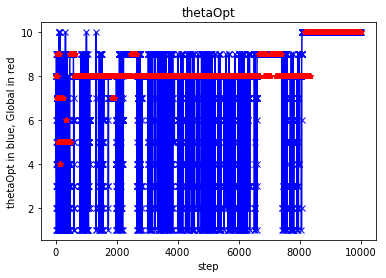

In [46]:
#The Initialzation

Xi = 1.3
print '**************Initialzation**********'

c1 = map(generateCost,range(1,11))  # Generate c1(theta)
costRecord = [[c1[i]] for i in range(10)]
costRecordMean = map(np.mean,costRecord) # Compute c_hat_theta_n
m = map(len,costRecord) #Compute m_theta_n
B = max(np.array(costRecord).flatten())
print B
print costRecord
print '**************Start Iteration**********'

print '****************10000Step**********'
thetaOpt = [];
thetaGlobal = [];
N = 10000
stepRange = range(10,N)
for n in stepRange:
    steplist = map(lambda x: costRecordMean[x] + B*math.sqrt(Xi * math.log(n)/m[x]),xrange(10))
    #thetaOptn, maxone = max(enumerate(map(lambda x: costRecordMean[x] + B*math.sqrt(Xi * math.log(n)/m[x]),xrange(10))));
    thetaOptn = steplist.index(max(steplist)) #find the max of costRecordMean[x] + B*math.sqrt(Xi * math.log(n)/m[x])
    thetaOpt.append(thetaOptn+1)
    costn = generateCost(thetaOptn+1) #Compute the cost of step n
    costRecord[thetaOptn].append(costn)
    
    #update c_hat_theta_n, m_theta_n, B
    
    costRecordMean = map(np.mean,costRecord) # Compute c_hat_theta_n
    m = map(len,costRecord) #Compute m_theta_n
    B = max(np.array(costRecord).flatten())[0]
    thetaGn = costRecordMean.index(max(costRecordMean))
    thetaGlobal.append(thetaGn+1)
    
print costRecordMean

print '****************Pi_n**********'
pi_m = [(float(i) / N) for i in m]
print pi_m
print '****************regret**********'
regret = (thetaGlobal[-1]  - sum([(pi_m[i] * (i+1)) for i in range(10)]))
print regret
   
plt.plot(stepRange,thetaOpt,'bx-')
plt.plot(stepRange,thetaGlobal,'r*')
plt.xlabel('step')
plt.ylabel(u'thetaOpt in blue, Global in red')
plt.title(u'thetaOpt')
plt.show()

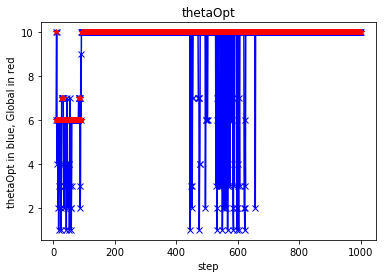

In [23]:
import matplotlib.pyplot as plt

plt.plot(stepRange,thetaOpt,'bx-')
plt.plot(stepRange,thetaGlobal,'r*')
plt.xlabel('step')
plt.ylabel(u'thetaOpt in blue, Global in red')
plt.title(u'thetaOpt')
plt.show()

In [192]:
pi_m = [(float(i) / N) for i in m]
print pi_m
regret = N * (thetaGlobal[-1]  - sum([(pi_m[i] * (i+1)) for i in range(10)]))
print regret

[0.0492, 0.0569, 0.0678, 0.0638, 0.0767, 0.1504, 0.069, 0.1437, 0.1342, 0.1883]
33691.0


In [47]:
plt.hist(thetaOpt)

(array([  237.,   265.,   358.,   355.,   577.,   558.,   778.,  2914.,
         2013.,  1935.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

0